# <span style="color:green"> Numerical Simulation Laboratory </span>
## Odalys Barrionuevo
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

### <span style="color:green"> Commento: </span>
<span style="color:green">Nella seguente esercitazione verrà testata una DNN con i seguenti ottimizzatori: SGD, Adam, RMSprop per il riconoscimento di cifre scritte a mano (da 0 a 9) provenienti dal daset MNIST che ne comprende 70000. Sotto viene testata la DNN con SGD e un numero di epoche pari a 10 per migliorare la performance (numero di epoche pari a 5 risultava troppo basso). L'SGD, a differrenza di Adam e RMSprop, è un'ottimizzatore non adattivo e dipende fortemente dal tasso di apprendimento scelto (sotto viene usato quello di default pari a 0.01). </span>

### <span style="color:green"> SGD: </span>

In [45]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import matplotlib #per grafici
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed) #setto il seme del generatore di numeri casuali
#per avere qualcosa di replicabile

In [46]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #scarico i dati e
#andiamo a suddividerli separatamente nel dataset di training e nel dataset
#di validation/test

#poi vado a stampare le shape del dataset
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
#sotto vediamo che ci sono 60000 immagini 28x28, 10000 delle quali saranno
#usate per fare validation con poi 60000 label, a ciascuno è associata
#una cifra
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [47]:
#dato che lavoreremo su una rete normale:feedforward, dobbiamo fare una
#flatten del dataset, perchè queste immagini 28x28 dobbiamo metterle su
#un vettore fatto con reshape. Diventa un vettore 28x28
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
#print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes) #gli sto passando
#le label e classi che in questo caso sono 10. Qusto metodo ci trasforma la
#label in numeri da 0 a 10 in un vettore di 10 componenti dove solo una
#varrà 1 e le altre saranno 0.
#usiamo il comando to_categorical e quello che succederà è che da label 4
#della 20a immagine di Y_train avrà una label che sarà un vettore lungo 10
#la cui unica componente con 1 sarà la quarta.
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)



In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    #la input_shape è messa a 28x28
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.
    #aggiungiamo un layer di Dropout con probabilità 0.5 che tende a spegnere
    #i neuroni in modo da aiutare la rete a generalizzare e non vincolarsi
    #troppo all'utilizzo di ogni neurone ma diventa robusta indipendentemente
    #da quale neurone utilizzerà nel successivo step. é un layer che si attiva
    #solamente nella fase di training, generando una difficoltà alla rete ma
    #richiedendo così un certo grado di capacità di generalizzazione. Nella
    #fase di test il Dropout non ha senso. Queso fa si che nei grafici della loss
    #il test in presenza di Dropout è più basso del training. Altrimenti dovrebbe
    #essere il contrario perchè i dati di test per la rete sono una novità
    model.add(Dropout(0.5))
    # soft-max layer perchè ho bisogno ceh diventino probabilità
    model.add(Dense(num_classes, activation='softmax'))

    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [49]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [50]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.6449 - loss: 1.1459 - val_acc: 0.9103 - val_loss: 0.3233
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - acc: 0.8791 - loss: 0.4220 - val_acc: 0.9286 - val_loss: 0.2459
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.9050 - loss: 0.3284 - val_acc: 0.9396 - val_loss: 0.2076
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.9213 - loss: 0.2820 - val_acc: 0.9469 - val_loss: 0.1817
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.9302 - loss: 0.2466 - val_acc: 0.9514 - val_loss: 0.1612
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - acc: 0.9370 - loss: 0.2238 - val_acc: 0.9554 - val_loss: 0.1464
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9443 - loss: 0.2003 - val_acc: 0.9579 - val_loss: 0.1348
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9494 - loss: 0.1808 - val_acc: 0.9618 - val_loss: 0.1247
Epoch 9/20
1875/1875 ━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9710 - loss: 0.0923

Test loss: 0.0783347487449646
Test accuracy: 0.9750999808311462


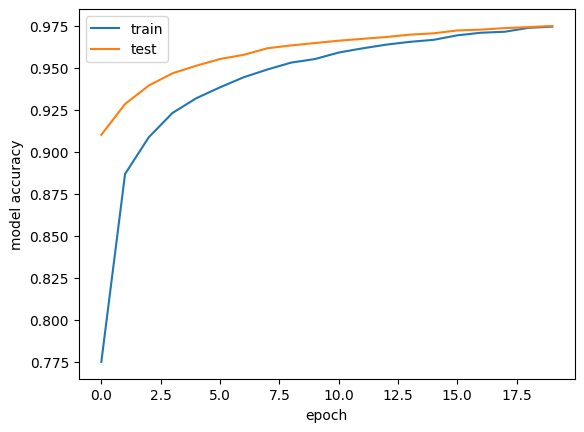

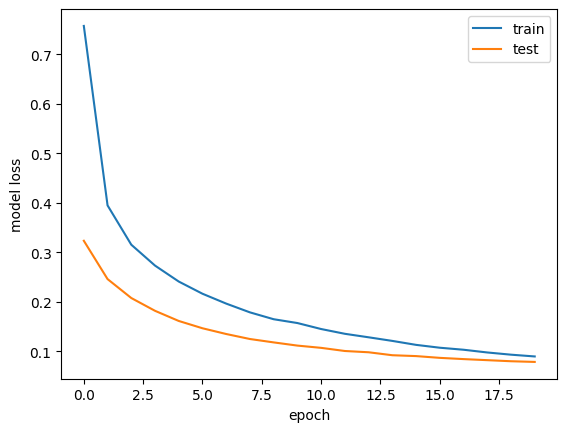

In [51]:
# evaluate model (andiamo a valutare il modello)
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


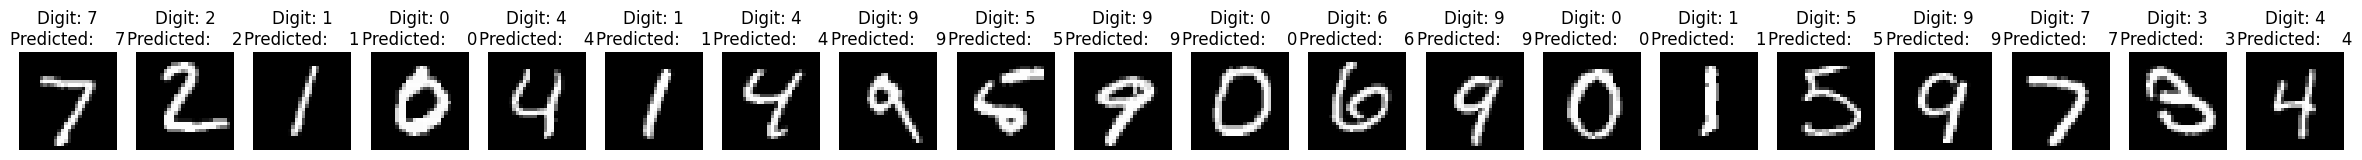

In [52]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(30, 30))
for i in range(20):
    ax = plt.subplot(2, 20, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

---

### <span style="color:green"> Commento: </span>
<span style="color:green">L'ottimizzatore scelto sotto è Adam. Senza modificare gli altri parametri, Adam rispetto a SGD converge troppo rapidamente. Questo potrebbe portare ad una memorizzazione dei dati di trainig piuttosto che ad una generalizzazione, soprattutto se abbiamo layer con una grande capacità come quella utilizzata in questo esercizio. Perciò per migliorare le performance sono state fatte le seguenti modifiche: il learning rate è stato abbassato a 0.0001 che indica un abbassamento della velocità di adattamento. Il batch size è stato aumentato a 64 per far usare alla rete meno dati per calcolare il gradiente. Il Dropout è stato aumentato a 0.7 e il numero di epoche è stato aumentato a 20. Inoltre Adam ha un tasso di apprendimento adattivo come RMSprop e a differenza di quest'ultimo Adam include una memoria storica dei gradienti.</span>

### <span style="color:green"> Adam: </span>

In [18]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import matplotlib #per grafici
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed) #setto il seme del generatore di numeri casuali
#per avere qualcosa di replicabile

In [19]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #scarico i dati e
#andiamo a suddividerli separatamente nel dataset di training e nel dataset
#di validation/test

#sotto vediamo che ci sono 60000 immagini 28x28, 10000 delle quali saranno
#usate per fare validation con poi 60000 label, a ciascuno è associata
#una cifra
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [20]:
#dato che lavoreremo su una rete normale:feedforward, dobbiamo fare una
#flatten del dataset, perchè queste immagini 28x28 dobbiamo metterle su
#un vettore fatto con reshape. Diventa un vettore 28x28
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#shape del dataset
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
#print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes) #gli sto passando
#le label e classi che in questo caso sono 10. Qusto metodo ci trasforma la
#label in numeri da 0 a 10 in un vettore di 10 componenti dove solo una
#varrà 1 e le altre saranno 0.
#usiamo il comando to_categorical e quello che succederà è che da label 4
#della 20a immagine di Y_train avrà una label che sarà un vettore lungo 10
#la cui unica componente con 1 sarà la quarta.
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)



In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    #la input_shape è messa a 28x28
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.
    #aggiungiamo un layer di Dropout con probabilità 0.5 che tende a spegnere
    #i neuroni in modo da aiutare la rete a generalizzare e non vincolarsi
    #troppo all'utilizzo di ogni neurone ma diventa robusta indipendentemente
    #da quale neurone utilizzerà nel successivo step. é un layer che si attiva
    #solamente nella fase di training, generando una difficoltà alla rete ma
    #richiedendo così un certo grado di capacità di generalizzazione. Nella
    #fase di test il Dropout non ha senso. Queso fa si che nei grafici della loss
    #il test in presenza di Dropout è più basso del training. Altrimenti dovrebbe
    #essere il contrario perchè i dati di test per la rete sono una novità
    model.add(Dropout(0.7))
    # soft-max layer perchè ho bisogno ceh diventino probabilità
    model.add(Dense(num_classes, activation='softmax'))

    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [22]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.0001),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')
create_DNN().summary()

Model compiled successfully and ready to be trained.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,110 (1.35 MB)

 Trainable params: 355,110 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# training parameters
batch_size = 64
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - acc: 0.5296 - loss: 1.4367 - val_acc: 0.9130 - val_loss: 0.3415
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - acc: 0.8527 - loss: 0.5262 - val_acc: 0.9325 - val_loss: 0.2422
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.8936 - loss: 0.3889 - val_acc: 0.9431 - val_loss: 0.1938
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - acc: 0.9123 - loss: 0.3238 - val_acc: 0.9490 - val_loss: 0.1675
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - acc: 0.9268 - loss: 0.2746 - val_acc: 0.9552 - val_loss: 0.1470
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9365 - loss: 0.2406 - val_acc: 0.9593 - val_loss: 0.1322
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 0.9426 - loss: 0.2133 - val_acc: 0.9627 - val_loss: 0.1196
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - acc: 0.9486 - loss: 0.1934 - val_acc: 0.9659 - val_loss: 0.1115
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9751 - loss: 0.0814

Test loss: 0.06960628926753998
Test accuracy: 0.979200005531311


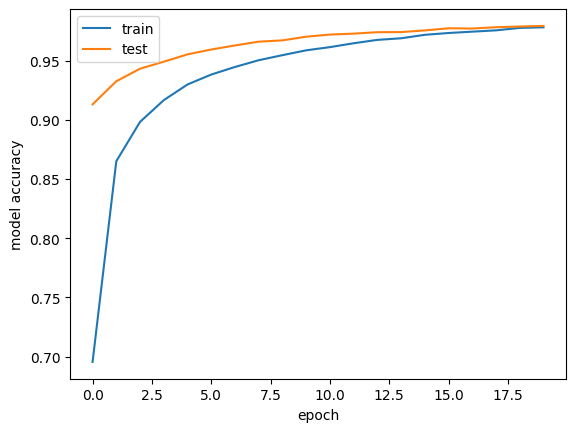

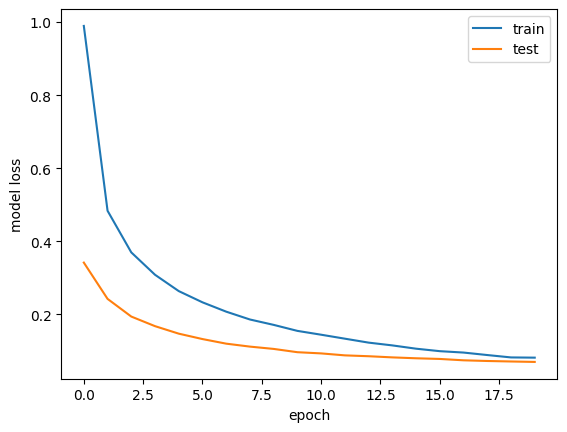

In [24]:
# evaluate model (andiamo a valutare il modello)
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


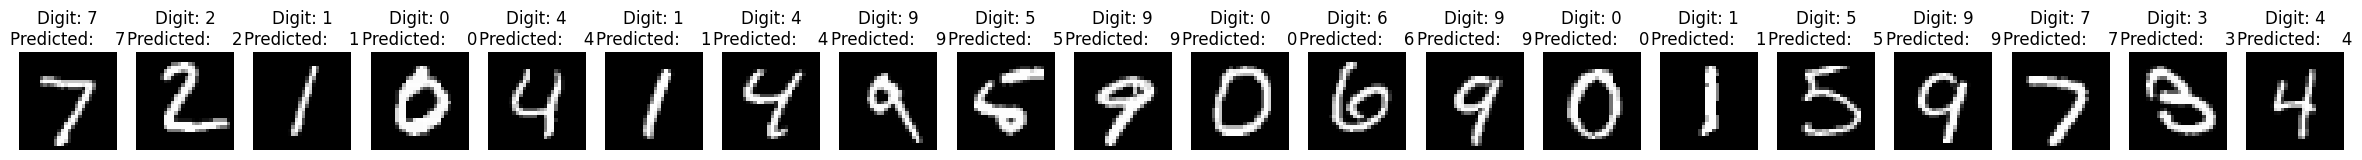

In [25]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(30, 30))
for i in range(20):
    ax = plt.subplot(2, 20, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

---

### <span style="color:green"> Commento: </span>
<span style="color:green">Nell'esempio di sotto è stato usato l'RMSprop (Root Mean Square propagation) che è un ottimizzatore adattivo, perciò rispetto a SGD performa meglio su dati che hanno gradienti molto variabili. Invece rispetto ad Adam è più semplice, se non si ha a che fare con problemi particolarmente complessi ma allo stesso tempo rumorosi, scegliere RMSprop potrebbe risultare vantaggioso dato che è computazionalmente meno costoso rispetto ad Adam. Le modifiche fatte per raggiungere una buona performance sono: il dropout è stato posto a 0.5, il learning_rate a 0.0001, il batch_size è stato aumentato a 128 e il numero di epoche a 20.</span>

### <span style="color:green"> RMSprop: </span>

In [10]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import matplotlib #per grafici
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed) #setto il seme del generatore di numeri casuali
#per avere qualcosa di replicabile

In [11]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #scarico i dati e
#andiamo a suddividerli separatamente nel dataset di training e nel dataset
#di validation/test

#sotto vediamo che ci sono 60000 immagini 28x28, 10000 delle quali saranno
#usate per fare validation con poi 60000 label, a ciascuno è associata
#una cifra
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [12]:
#dato che lavoreremo su una rete normale:feedforward, dobbiamo fare una
#flatten del dataset, perchè queste immagini 28x28 dobbiamo metterle su
#un vettore fatto con reshape. Diventa un vettore 28x28
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#shape del dataset
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
#print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes) #gli sto passando
#le label e classi che in questo caso sono 10. Qusto metodo ci trasforma la
#label in numeri da 0 a 10 in un vettore di 10 componenti dove solo una
#varrà 1 e le altre saranno 0.
#usiamo il comando to_categorical e quello che succederà è che da label 4
#della 20a immagine di Y_train avrà una label che sarà un vettore lungo 10
#la cui unica componente con 1 sarà la quarta.
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)



In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    #la input_shape è messa a 28x28
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.
    #aggiungiamo un layer di Dropout con probabilità 0.5 che tende a spegnere
    #i neuroni in modo da aiutare la rete a generalizzare e non vincolarsi
    #troppo all'utilizzo di ogni neurone ma diventa robusta indipendentemente
    #da quale neurone utilizzerà nel successivo step. é un layer che si attiva
    #solamente nella fase di training, generando una difficoltà alla rete ma
    #richiedendo così un certo grado di capacità di generalizzazione. Nella
    #fase di test il Dropout non ha senso. Queso fa si che nei grafici della loss
    #il test in presenza di Dropout è più basso del training. Altrimenti dovrebbe
    #essere il contrario perchè i dati di test per la rete sono una novità
    model.add(Dropout(0.5))
    # soft-max layer perchè ho bisogno ceh diventino probabilità
    model.add(Dense(num_classes, activation='softmax'))

    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [14]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(learning_rate=0.0001),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')
create_DNN().summary()

Model compiled successfully and ready to be trained.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,110 (1.35 MB)

 Trainable params: 355,110 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# training parameters
batch_size = 128
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - acc: 0.6095 - loss: 1.2846 - val_acc: 0.9070 - val_loss: 0.3471
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.8751 - loss: 0.4413 - val_acc: 0.9264 - val_loss: 0.2499
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - acc: 0.9066 - loss: 0.3345 - val_acc: 0.9381 - val_loss: 0.2073
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.9240 - loss: 0.2753 - val_acc: 0.9465 - val_loss: 0.1784
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - acc: 0.9333 - loss: 0.2377 - val_acc: 0.9530 - val_loss: 0.1571
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.9415 - loss: 0.2084 - val_acc: 0.9559 - val_loss: 0.1423
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - acc: 0.9476 - loss: 0.1897 - val_acc: 0.9601 - val_loss: 0.1315
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9518 - loss: 0.1717 - val_acc: 0.9627 - val_loss: 0.1211
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9758 - loss: 0.0864

Test loss: 0.07507497817277908
Test accuracy: 0.9787999987602234


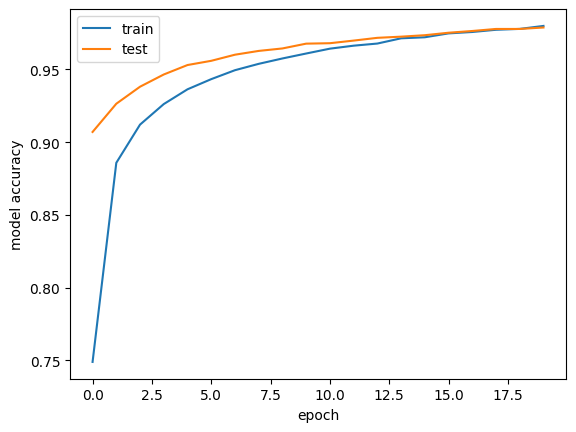

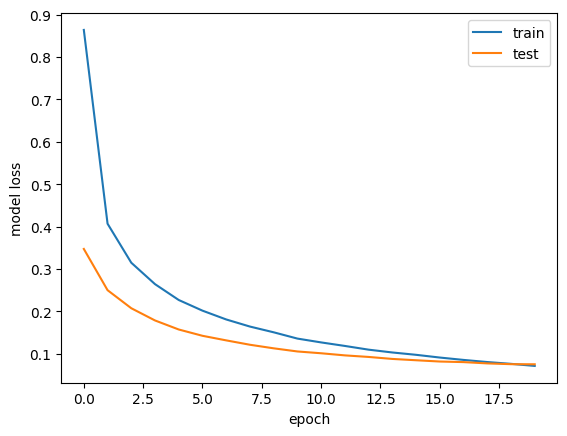

In [16]:
# evaluate model (andiamo a valutare il modello)
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


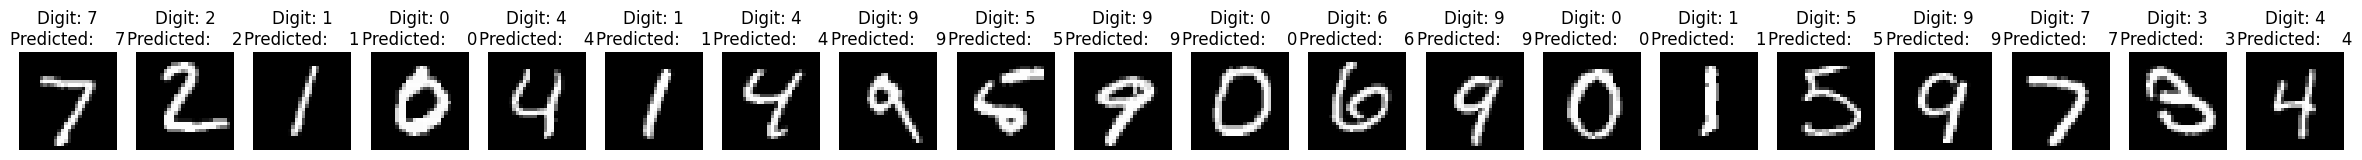

In [17]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(30, 30))
for i in range(20):
    ax = plt.subplot(2, 20, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

---

#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [26]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

### <span style="color:green"> Commento: </span>
<span style="color:green">Nel seguente esercizio è stata creata una CNN con lo scopo di confrontarla con la DNN per il riconoscimento delle cifre scritte a mano. La CNN ha i seguenti layers: layer convoluzionale con 6 filtri e un nucleo di 5x5, un layer di Maxpooling con dimensione del pool 2x2, un altro layer convoluzionale con 16 filtri e nucleo 5x5 e un altro layer di Maxpooling uguale al precedente. Successivamente le matrici sono state appiattite e sono stati aggiunti dei layers densi di 120 neuroni (seguito da un dropout di 0.2) di 100 neuroni e 10 neuroni (che corrisponde al layer di output). Le funzioni di attivazione usati sono tanh e nel layer di output è stata usata la funzione softmax (dato che abbiamo bisogno di un output che ci restituisca qual è la cifra predetta più probabile. L'ottimizzatore usato è lo SGD. Il batch_size è di 32 e il numero di epoche scelto è 20 (già con 10 performava abbastanza bene).  </span>

In [27]:
#THIS IS INCOMPLETE ... COMPLETE BEFORE EXECUTING IT

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='tanh',
                     input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ...
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='tanh'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(120, activation='tanh'))

    model.add(Dropout(0.2))

    model.add(Dense(100, activation='tanh'))

    model.add(Dense(10, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

Train your DCNN and evaluate its performance proceeding exactly as before:

In [29]:
# training parameters
batch_size = 32
epochs = 20# INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - acc: 0.7299 - loss: 0.9739 - val_acc: 0.9395 - val_loss: 0.2177
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - acc: 0.9346 - loss: 0.2309 - val_acc: 0.9607 - val_loss: 0.1359
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - acc: 0.9545 - loss: 0.1593 - val_acc: 0.9695 - val_loss: 0.1026
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9626 - loss: 0.1264 - val_acc: 0.9749 - val_loss: 0.0843
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - acc: 0.9697 - loss: 0.1055 - val_acc: 0.9784 - val_loss: 0.0728
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - acc: 0.9721 - loss: 0.0944 - val_acc: 0.9791 - val_loss: 0.0650
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - acc: 0.9751 - loss: 0.0855 - val_acc: 0.9810 - val_loss: 0.0603
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9774 - loss: 0.0781 - val_acc: 0.9819 - val_loss: 0.0556
Epoch 9/20
1875/1875 ━━━

In the end, **<span style="color:red">add the evaluation of your CNN performances</span>** like that used for the DNN.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9834 - loss: 0.0474

Test loss: 0.03969671204686165
Test accuracy: 0.9865999817848206


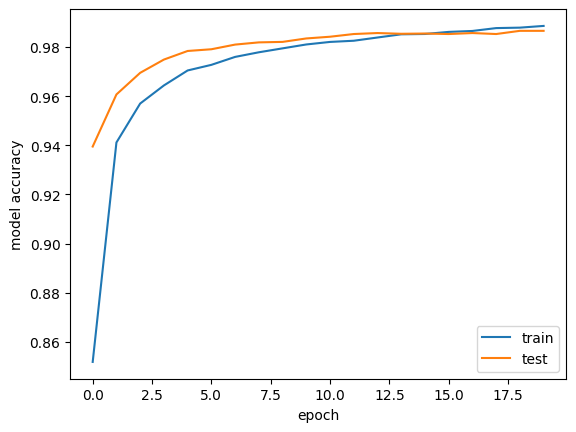

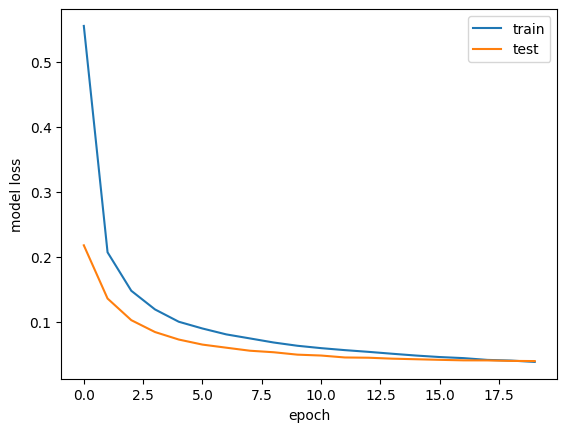

In [30]:
# evaluate model (andiamo a valutare il modello)
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

### <span style="color:green"> Commento: </span>
<span style="color:green"> Nel seguente esercizio sono state create le 10 cifre numeriche con l'aiuto dell'applicazione gimp per poter essere usate dalla rete CNN per il loro riconoscimento. In aggiunta le 10 cifre sono state usate anche dalla rete DNN creata precedentemente e i risultati sono stati confrontati con la rete convoluzionale. Si può notare che la rete convoluzionale a differenza della DNN riconosce correttamente tutte le cifre. La DNN ne sbaglia 3. Questi risultati mostrano che l'accuratezza migliora se si usa la CNN.</span>

### <span style="color:green"> CNN: </span>

In [40]:
# TO LOAD FILES ON GOOGLE COLAB
from google.colab import files
upload = files.upload() #this will let you browse and choose the file to be uploaded

Saving 8.png to 8.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


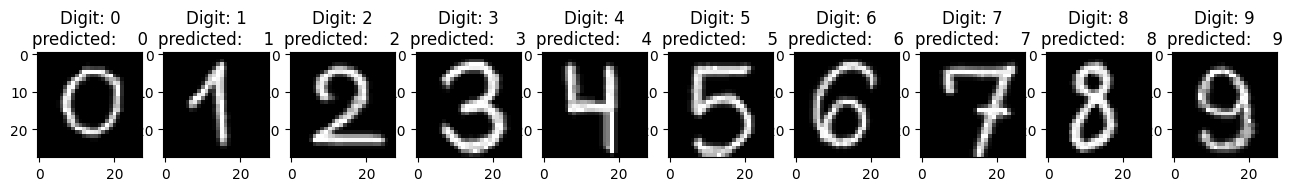

(28, 28)


In [41]:
from PIL import Image
import os

plt.figure(figsize=(16,3))
for i in range (0, 10, 1):
  #digit_filename = +str(i)+'.png'
  #digit_in = Image.open(digit_filename).convert('L')
  digit_in = Image.open(str(i)+".png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

  ydim, xdim = digit_in.size
#print("Image size: "+str(xdim)+"x"+str(ydim))
  pix=digit_in.load();
  data = np.zeros((xdim, ydim))
  for j in range(ydim):
    for k in range(xdim):
        data[k,j]=pix[j,k]

  data /= 255
  data = data.reshape(1,xdim,ydim,1)
  pred_0 = model_CNN.predict(data)
  data = data.reshape(xdim,ydim)

  plt.subplot(1,10,i+1)
  plt.imshow(data, cmap='gray')
  plt.title("Digit: "+str(i)+"\npredicted:    {}".format(np.argmax(pred_0)))

plt.show()

print(data.shape)

### <span style="color:green"> DNN: </span>

I use the previously trained DNN to predict the digit:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<Figure size 1600x300 with 0 Axes>

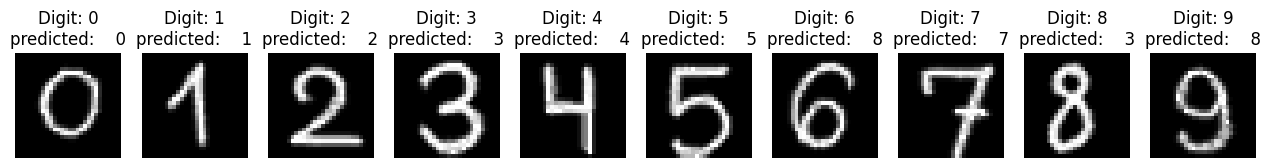

(10, 28, 28)


In [42]:
from PIL import Image
import os

plt.figure(figsize=(16,3))
for i in range (10):
  #digit_filename = +str(i)+'.png'
  #digit_in = Image.open(digit_filename).convert('L')
  digit_in = Image.open(str(i)+".png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
  if i == 0:
    ydim, xdim = digit_in.size
    data = np.zeros((10, xdim, ydim))
#print("Image size: "+str(xdim)+"x"+str(ydim))
  pix=digit_in.load();
  #data = np.zeros((xdim, ydim))
  for j in range(ydim):
    for k in range(xdim):
        data[i,k,j]=pix[j,k]

data /= 255
data = data.reshape(10, xdim*ydim)
pred_1 = model_DNN.predict(data)
data = data.reshape(10, xdim, ydim)

plt.figure(figsize=(16,3))
for i in range (10):
  plt.subplot(1,10,i+1)
  plt.imshow(data[i], cmap='gray')
  plt.title("Digit: "+str(i)+"\npredicted:    {}".format(np.argmax(pred_1[i])))
  plt.axis('off')
plt.show()

print(data.shape)

### <span style="color:green">Supplementary information 2: Display trained filters in your CNN</span>

Print your NN layers:

In [43]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d_2
1 max_pooling2d_2
2 conv2d_3
3 max_pooling2d_3
4 flatten_1
5 dense_21
6 dropout_7
7 dense_22
8 dense_23


Display your filters:

(5, 5, 1, 6)


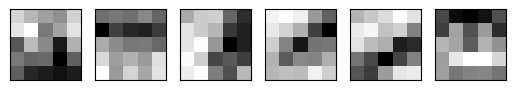

In [44]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

### <span style="color:green">Supplementary information 3: Monitor layer outputs in your CNN</span>

In [ ]:
test_index = 0

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))

def display_activation(activations, col_size, row_size, layer_index):
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 4, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer